# Warsztaty badawcze - Autogluon
- Mikołaj Gałkowski
- Kacper Kurowski
- Hubert Bujakowski

In [20]:
import utils
import pandas as pd
import openml
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
suite = openml.study.get_suite(218)

In [ ]:
tasks = suite.tasks

In [ ]:
# filtruje datasety, które są klasyfikacją binarną
ids = []
for el in tasks:
    task = openml.tasks.get_task(el)
    dataset = task.get_dataset()
    if pd.DataFrame(dataset.get_data()[0])[dataset.default_target_attribute].nunique() == 2:
        ids.append(el)

In [ ]:
# id datasetu po przefiltrowaniu
# ids = [3, 31, 3917, 3945, 7592, 9952, 9977, 10101, 14965, 34539, 146606, 146818,
#        167120, 168335, 168337, 168338, 168868, 168908, 168911, 168912, 189354, 189356]

In [ ]:
df = pd.DataFrame(columns=['model', 'score_test', 'dataset'])

for i in ids:
    task = openml.tasks.get_task(i)
    dataset = task.get_dataset()
    
    results = utils.make_kfold_cross_valiation(
            url = dataset.url,
            name = dataset.name,
            variable_to_predict = dataset.default_target_attribute,
            no_of_folds = 10,
            random_state = None,
            shuffle = False,
            preset = 'medium_quality'
    )
    
    for el in results:
        if el.shape[0] > 1:
            el = el.head(1)
        df = pd.concat([df, el])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


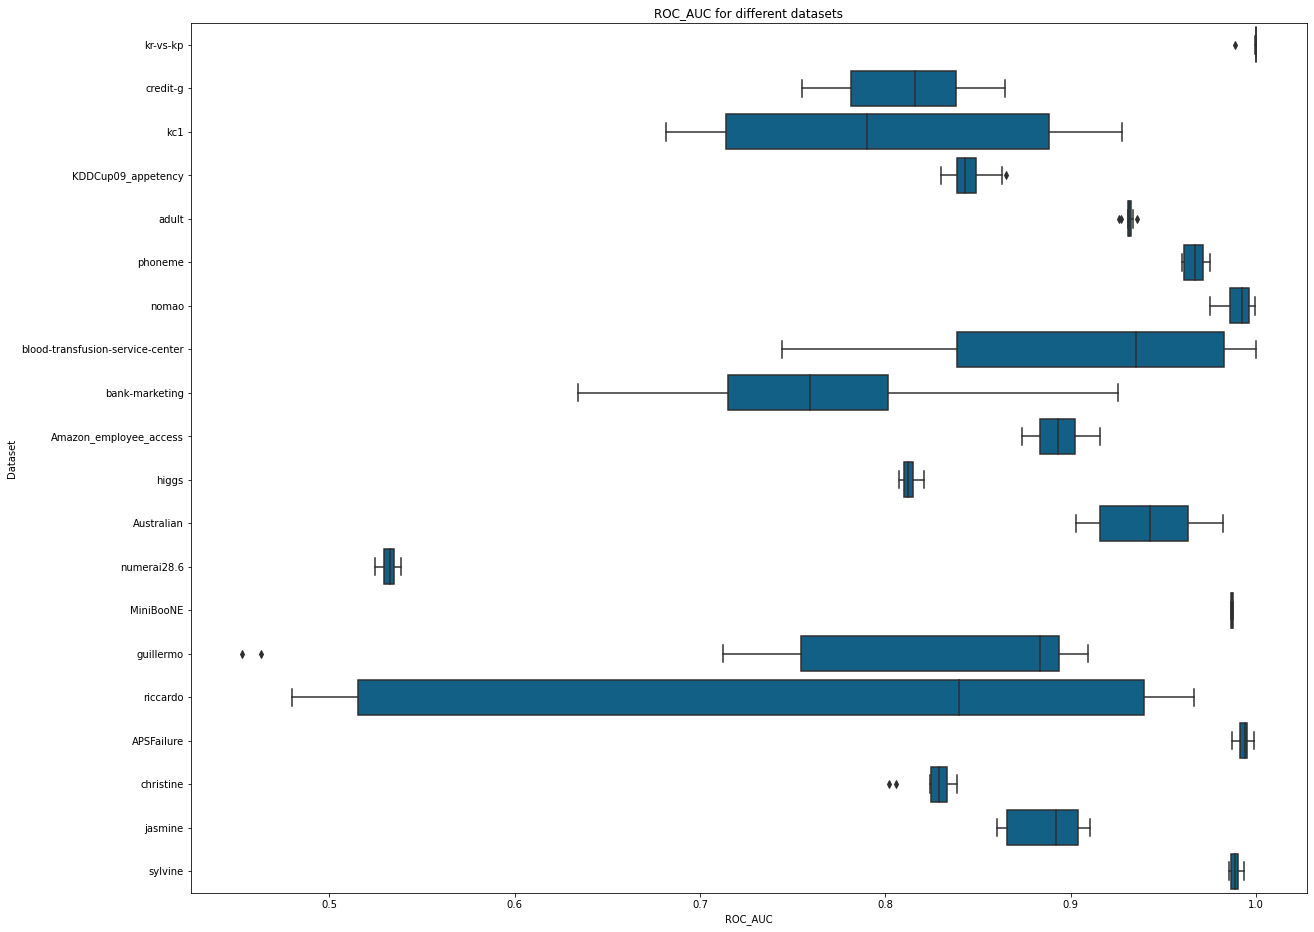

In [21]:
plt.figure(figsize=(20,16))
sns.boxplot(df['score_test'],df['dataset'], color='#006699')
plt.xlabel('ROC_AUC')
plt.ylabel('Dataset')
plt.title('ROC_AUC for different datasets')
plt.rcParams.update({'font.size': 30})
# plt.xticks(rotation=90)